In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

In [14]:
df_US = df[df["job_country"] == "United States"].copy()
df_US["job_posted_month"] = df_US["job_posted_date"].dt.strftime("%B")
df_US_pivot = df_US.pivot_table(index="job_posted_month", columns="job_title_short", aggfunc="size")
df_US_pivot.reset_index(inplace=True) 
df_US_pivot["month_no"] = pd.to_datetime(df_US_pivot["job_posted_month"], format="%B").dt.month 
df_US_pivot.sort_values("month_no", inplace=True)
df_US_pivot.set_index("job_posted_month", inplace=True) # sets the column of now "job_posted_month" to became its index ie row label 
df_US_pivot.drop(columns="month_no", inplace=True)

In [9]:
US_software_jobs = pd.read_csv("https://lukeb.co/software_csv", index_col="job_posted_month")
US_software_jobs

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [ ]:
merged_jobs = df_US_pivot.merge(US_software_jobs, on="job_posted_month")
merged_jobs


In [20]:
top_US_jobs = merged_jobs.sum().sort_values(ascending=False).head().index.to_list()
top_US_jobs

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

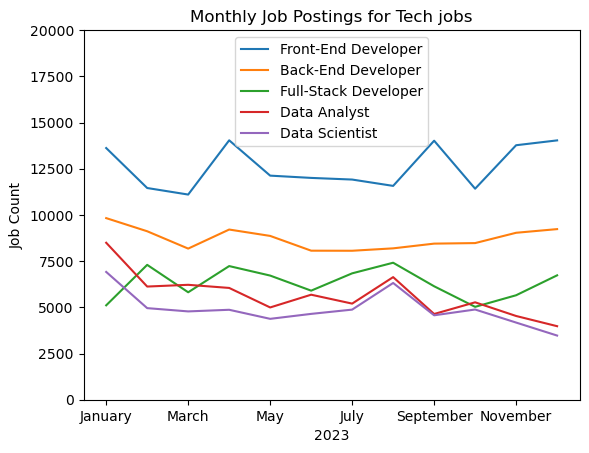

In [ ]:
merged_jobs[top_US_jobs].plot(kind="line")
plt.title("Monthly Job Postings for Tech jobs")
plt.xlabel("2023")
plt.ylabel("Job Count")
plt.ylim(0, 20000) # y-axis x,y = x is the min value while y is the max value
plt.legend()
plt.show()